In [17]:
import numpy as np
from lmfit import Model, Parameters
import emcee

# 모델 함수 정의
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# 데이터 생성
x = np.linspace(0, 10, 100)
y = func(x, 2.5, 1.3, 0.5)
y_noise = y + np.random.normal(scale=0.1, size=len(x))

# 모델 생성
model = Model(func)

# 초기 파라미터 설정
params = Parameters()
params.add('a', value=1.0)
params.add('b', value=1.0)
params.add('c', value=1.0)

# 최적화 실행
result = model.fit(y_noise, params, x=x, method='emcee', nan_policy='omit')

# MCMC 샘플링 결과
samples = result.flatchain

# 파라미터 추정 결과
best_params = result.best_values

# 사후 분포 플롯
print(best_params)

 28%|██▊       | 276/1000 [00:00<00:01, 572.94it/s]/var/folders/73/438czwkx0jb_7z61gc79vcb40000gn/T/ipykernel_3851/4243262698.py:7: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c
 46%|████▌     | 459/1000 [00:00<00:00, 595.97it/s]/var/folders/73/438czwkx0jb_7z61gc79vcb40000gn/T/ipykernel_3851/4243262698.py:7: RuntimeWarning: overflow encountered in multiply
  return a * np.exp(-b * x) + c
100%|██████████| 1000/1000 [00:01<00:00, 588.30it/s]


{'a': 2.9576799738028434, 'b': 1.4766148574143019, 'c': 0.5826983971585129}


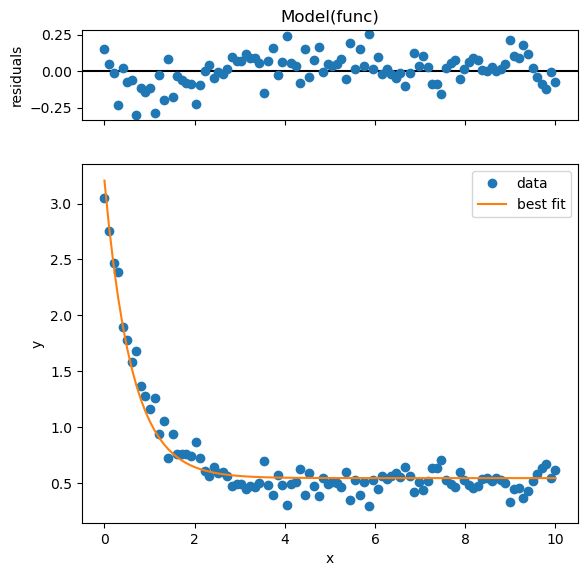

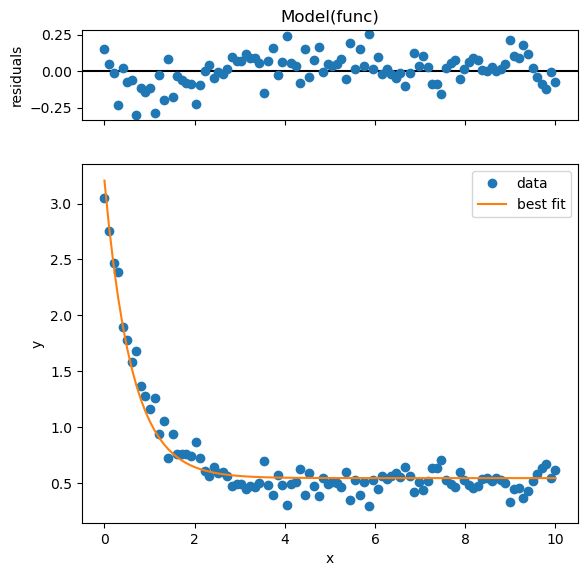

In [15]:
result.plot()